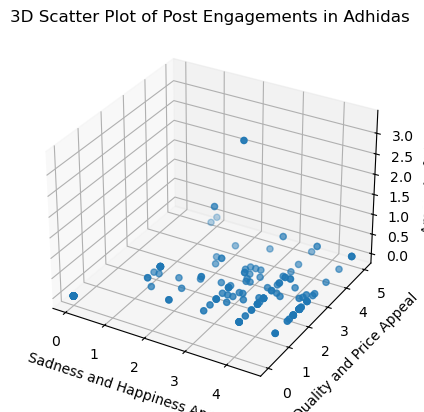

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# アップロードされたファイルパス
file_path = 'Nike Data Book.xlsx'  # 実際のファイルパスに置き換えてください

# エクセルファイルを読み込む
df = pd.read_excel(file_path)

# 必要な列を数値型に変換
features_to_convert = ['Sadness Appeal', 'Fear Appeal', 'Performance Appeal', 'Price Appeal', 'Amount of Like']
for feature in features_to_convert:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
df.fillna(0, inplace=True)

# X軸の計算
df["X_axis"] = 0.525 * df['Sadness Appeal'] + 0.475 * df['Fear Appeal']

# Y軸の計算
df["Y_axis"] = 0.35 * df['Performance Appeal'] + 0.65 * df['Price Appeal']

# Z軸（エンゲージメント数）をDataFrameから取得
Z_axis = df['Amount of Like']

# 3D散布図をプロット
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 散布図のプロット
ax.scatter(df['X_axis'], df['Y_axis'], Z_axis)

# 軸のラベルを設定
ax.set_xlabel('Sadness and Fear Appeal')
ax.set_ylabel('Performance and Price Appeal')
ax.set_zlabel('Amount of Like')

# タイトルを設定
plt.title('3D Scatter Plot of Post Engagements in Adhidas')

# 散布図を表示
plt.show()


/Users/takahiro/anaconda3/envs/JupyterLab_P3117/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


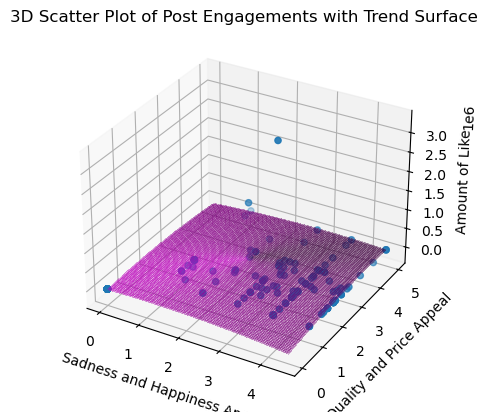

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# アップロードされたファイルパス
file_path = 'Adhidas Data Book.xlsx'  # 実際のファイルパスに置き換えてください

# エクセルファイルを読み込む
df = pd.read_excel(file_path)

# 必要な列を数値型に変換
features_to_convert = ['Sadness Appeal', 'Happiness Appeal', 'Quality Appeal', 'Price Appeal', 'Amount of Like']
for feature in features_to_convert:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
df.fillna(0, inplace=True)

# X軸とY軸の計算
df["X_axis"] = 0.13 * df['Sadness Appeal'] + 0.87 * df['Happiness Appeal']
df["Y_axis"] = 0.3 * df['Quality Appeal'] + 0.7 * df['Price Appeal']

# Z軸（エンゲージメント数）をDataFrameから取得
Z_axis = df['Amount of Like']

# トレンド曲面のフィットに多項式回帰を使用
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['X_axis', 'Y_axis']])
model = LinearRegression().fit(X_poly, Z_axis)

# 曲面を描画するためのグリッドを作成
X_surf, Y_surf = np.meshgrid(np.linspace(df['X_axis'].min(), df['X_axis'].max(), 100), 
                             np.linspace(df['Y_axis'].min(), df['Y_axis'].max(), 100))
Z_surf = model.predict(poly.transform(np.c_[X_surf.ravel(), Y_surf.ravel()])).reshape(X_surf.shape)

# 3D散布図をプロット
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 散布図のプロット
ax.scatter(df['X_axis'], df['Y_axis'], Z_axis)

# トレンド曲面のプロット
ax.plot_surface(X_surf, Y_surf, Z_surf, alpha=0.3, color='m', rstride=1, cstride=1, linewidth=0, antialiased=False)

# 軸のラベルを設定
ax.set_xlabel('Sadness and Happiness Appeal')
ax.set_ylabel('Quality and Price Appeal')
ax.set_zlabel('Amount of Like')

# タイトルを設定
plt.title('3D Scatter Plot of Post Engagements with Trend Surface')

# 散布図を表示
plt.show()


/Users/takahiro/anaconda3/envs/JupyterLab_P3117/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



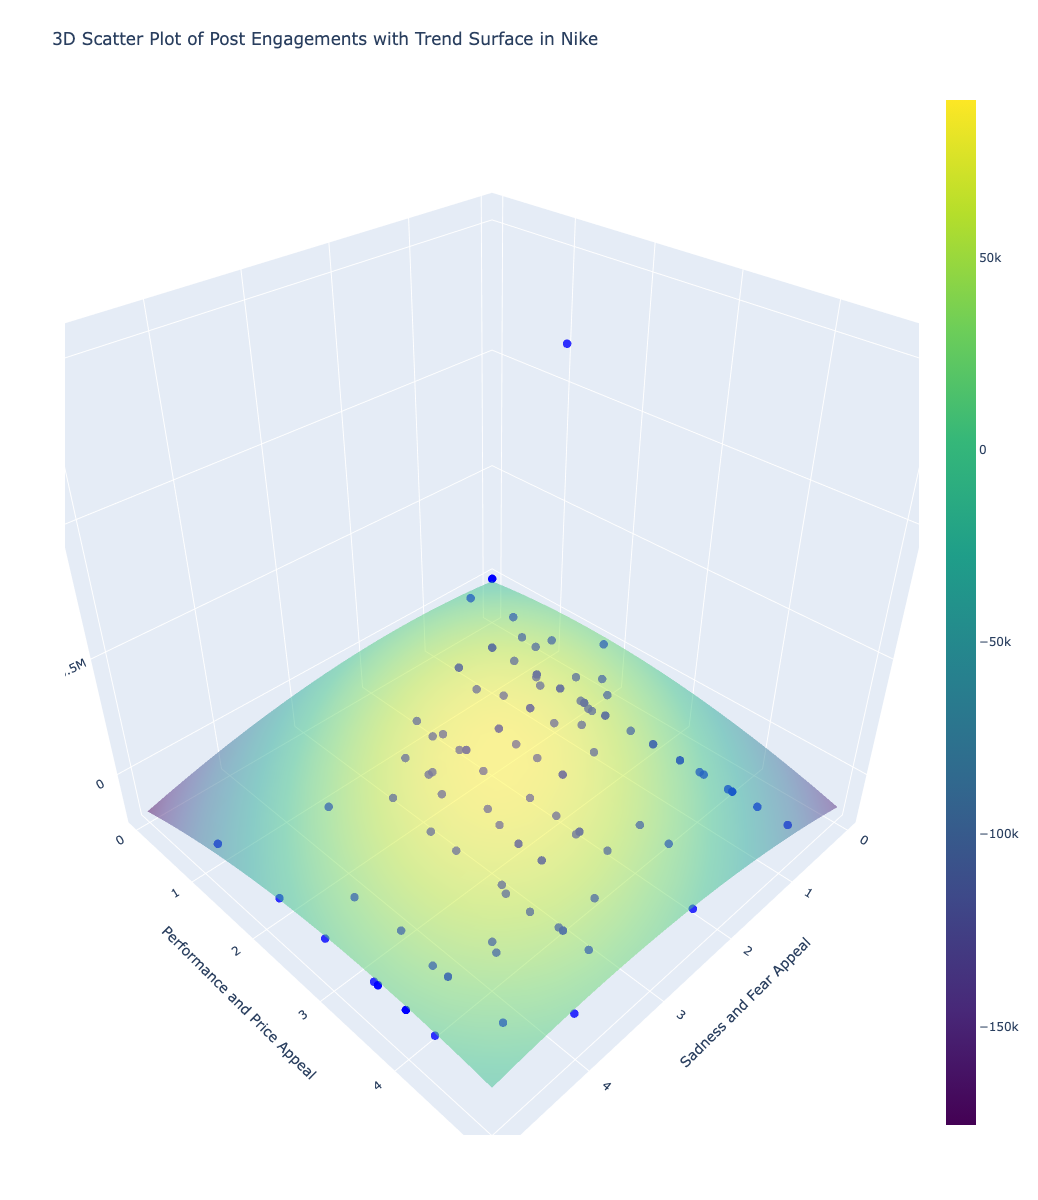

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# アップロードされたファイルパス
file_path = 'Nike Data Book.xlsx'  # 実際のファイルパスに置き換えてください

# エクセルファイルを読み込む
df = pd.read_excel(file_path)

# 必要な列を数値型に変換し、NaN値を0で置き換え
features_to_convert = ['Sadness Appeal', 'Fear Appeal', 'Performance Appeal', 'Price Appeal', 'Amount of Like']
for feature in features_to_convert:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
df.fillna(0, inplace=True)

# X軸とY軸の計算
df["X_axis"] = 0.525 * df['Sadness Appeal'] + 0.475 * df['Fear Appeal']
df["Y_axis"] = 0.35 * df['Performance Appeal'] + 0.65 * df['Price Appeal']

# Z軸（エンゲージメント数）をDataFrameから取得
Z_axis = df['Amount of Like']

# トレンド曲面のフィットに多項式回帰を使用
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['X_axis', 'Y_axis']])
model = LinearRegression().fit(X_poly, Z_axis)

# 曲面を描画するためのグリッドを作成
X_surf, Y_surf = np.meshgrid(np.linspace(df['X_axis'].min(), df['X_axis'].max(), 20), 
                             np.linspace(df['Y_axis'].min(), df['Y_axis'].max(), 20))
Z_surf = model.predict(poly.transform(np.c_[X_surf.ravel(), Y_surf.ravel()])).reshape(X_surf.shape)

# 3D散布図とトレンド曲面をPlotlyでプロット
fig = go.Figure()

# 散布図のプロット
fig.add_trace(go.Scatter3d(x=df['X_axis'], y=df['Y_axis'], z=Z_axis, mode='markers', 
                           marker=dict(size=5, color='blue', opacity=0.8)))

# トレンド曲面のプロット
fig.add_trace(go.Surface(x=X_surf, y=Y_surf, z=Z_surf, colorscale='Viridis', opacity=0.5))

# レイアウトの設定
fig.update_layout(title='3D Scatter Plot of Post Engagements with Trend Surface in Nike',
                  scene=dict(
                      xaxis_title='Sadness and Fear Appeal',
                      yaxis_title='Performance and Price Appeal',
                      zaxis_title='Amount of Like'
                  ),
                  autosize=False,
                  width=1200, height=12
                  00,
                  margin=dict(l=65, r=50, b=65, t=90))

# プロットの表示
fig.show()
